Описание проекта: телекоммуникации
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

In [1]:
conda install -c conda-forge shap

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:

!pip install shap


import  shap
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter('ignore')
from scipy import stats as st

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from sklearn.utils import shuffle
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
from sklearn.metrics import (
    
    confusion_matrix, 
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.compose import make_column_transformer




from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
import lightgbm

from sklearn.compose import make_column_transformer



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (StandardScaler)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
    )
from lightgbm import LGBMClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc
import sklearn.metrics
from catboost import CatBoostClassifier
RANDOM_STATE=290124

План проекта
Шаг 1. Загрузка данных
Шаг 2. Исследовательский анализ и предобработка данных
Выполните исследовательский анализ каждого датафрейма и при необходимости выполните предобработку. Сделайте выводы об имеющихся признаках: понадобятся ли они для обучения моделей.
Шаг 3. Объединение данных
Объедините выбранные вами признаки в один датафрейм по ключу.
Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма
Выполните исследовательский анализ объединённого датафрейма, визуализируйте распределения признаков и при необходимости выполните предобработку. Проведите корреляционный анализ. Напоминаем, что вы можете использовать не только имеющиеся признаки, но и генерировать новые.
Шаг 5. Подготовка данных
Выполните подготовку данных для обучения модели. Разделите данные на две выборки, при масштабировании и кодировании учитывайте особенности данных и моделей.
Шаг 6. Обучение моделей машинного обучения
Обучите как минимум две модели. Хотя бы для одной из них подберите как минимум два гиперпараметра.
Шаг 7. Выбор лучшей модели
Выберите лучшую модель и проверьте её качество на тестовой выборке.
Шаг 8. Общий вывод и рекомендации заказчику

 ### Шаг 1  Загрузка данных

In [3]:
try :
    contract_new  = pd.read_csv('/datasets/contract_new.csv',parse_dates=['BeginDate'])
    personal_new  = pd.read_csv('/datasets/personal_new.csv')
    internet_new = pd.read_csv('/datasets/internet_new.csv')
    phone_new =pd.read_csv('/datasets/phone_new.csv')
except:
    contract_new  = pd.read_csv('contract_new.csv',parse_dates=['BeginDate'])
    personal_new  = pd.read_csv('personal_new.csv')
    internet_new = pd.read_csv('internet_new.csv')
    phone_new =pd.read_csv('phone_new.csv')
display(contract_new.head(10))
display(personal_new.head(10))
display(internet_new.head(10))      
display(phone_new.head(10))  

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [4]:
print(contract_new.dtypes)
print(personal_new.dtypes)  
print(internet_new.dtypes)  
print(phone_new.dtypes)  

customerID                  object
BeginDate           datetime64[ns]
EndDate                     object
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
dtype: object
customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object
customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object
customerID       object
MultipleLines    object
dtype: object


Изучив данные видим что BeginDate нужно распознать как дату 
contract_new  TotalCharges почему то  object
personal_new SeniorCitizen  float64 можно сделать целочисленным
Также во многих данных испольщуется тип object что не очень экономично по данным но все равно будет использоваться кодирование для моделей мо поэтому не трогаем
Также customerID нужно привести к общему виду 

### Шаг 2. Исследовательский анализ и предобработка данных

In [5]:
#функция для получения общей информации о датафрейме
def df_inf(data): 
    display(data.head(2))
    display(data.describe(include='all').T)
    display(data.info())
    for column in data.columns:
        display()
        display(column)
        display(data[column].unique())
    display(data[data.duplicated()])
    display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm') )

In [6]:
df_inf(contract_new)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customerID,7043,7043,2468-SJFLM,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeginDate,7043,77,2014-02-01 00:00:00,366,2013-10-01,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,67,No,5942,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,NaT,NaT,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043,6658,,11,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'BeginDate'

array(['2020-01-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2014-03-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2017-11-01

'EndDate'

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

'Type'

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'PaperlessBilling'

array(['Yes', 'No'], dtype=object)

'PaymentMethod'

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

'MonthlyCharges'

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

'TotalCharges'

array(['31.04', '2071.84', '226.17', ..., '325.6', '520.8', '7251.82'],
      dtype=object)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


,0
customerID,0.000000
BeginDate,0.000000
EndDate,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000


Изучая данные видим что пропусков нет данные регистрации пользователей  за период 2013-10-01	2020-02-01
в среднем пользователь платит 64.761692 долларов в месяц
Также customerID нужно привести к общему виду 
также TotalCharges почему то в форме object переведем в float64  

In [7]:
contract_new = contract_new.rename(columns={'customerID': 'CustomerID'})

In [8]:
contract_new['TotalCharges']=pd.to_numeric(contract_new['TotalCharges'], errors ='coerce')
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


In [9]:
contract_new['TotalCharges'].isna().sum()

11

In [10]:
contract_new.query('TotalCharges.isna()')

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Появились пропуски в столбце TotalCharges проверили и убедились что это новые клиенты , поставим TotalCharges=	0


In [11]:
contract_new['TotalCharges']=contract_new['TotalCharges'].fillna(0)
contract_new['TotalCharges'].isna().sum()

0

In [12]:
df_inf(personal_new)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,2468-SJFLM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'gender'

array(['Female', 'Male'], dtype=object)

'SeniorCitizen'

array([0, 1])

'Partner'

array(['Yes', 'No'], dtype=object)

'Dependents'

array(['No', 'Yes'], dtype=object)

,customerID,gender,SeniorCitizen,Partner,Dependents


,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000


видим что данные распределены равномерно по полу ,есть ли супруг /супруга . по столбцу Dependents видно что пользовтаелей с детьми больше чем без 
Также customerID	gender нужно привести к общему виду 

In [13]:
personal_new = personal_new.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender'})

In [14]:
df_inf(internet_new)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No


,count,unique,top,freq
customerID,5517,5517,2468-SJFLM,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'InternetService'

array(['DSL', 'Fiber optic'], dtype=object)

'OnlineSecurity'

array(['No', 'Yes'], dtype=object)

'OnlineBackup'

array(['Yes', 'No'], dtype=object)

'DeviceProtection'

array(['No', 'Yes'], dtype=object)

'TechSupport'

array(['No', 'Yes'], dtype=object)

'StreamingTV'

array(['No', 'Yes'], dtype=object)

'StreamingMovies'

array(['No', 'Yes'], dtype=object)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


,0
customerID,0.000000
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
TechSupport,0.000000
StreamingTV,0.000000
StreamingMovies,0.000000


пропусков нет данные распределены равномерно
	customerID к общ виду

In [15]:
internet_new = internet_new.rename(columns={'customerID': 'CustomerID'})


In [16]:
df_inf(phone_new)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No


,count,unique,top,freq
customerID,6361,6361,2468-SJFLM,1
MultipleLines,6361,2,No,3390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

'customerID'

array(['5575-GNVDE', '3668-QPYBK', '9237-HQITU', ..., '2234-XADUH',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'MultipleLines'

array(['No', 'Yes'], dtype=object)

,customerID,MultipleLines


,0
customerID,0.000000
MultipleLines,0.000000


пропусков нет данные распределены равномерно

In [17]:
phone_new = phone_new.rename(columns={'customerID': 'CustomerID'})

Вывод .

Данные были загружены и изучены. В большинстве столбцов распределение похоже на нормальное, дубликатов не обнаружено, пропусков тоже

In [18]:
def create_plot(df):
    fig, axes = plt.subplots(ncols=len(df.columns), figsize=(10,5))
    for col, ax in zip(df, axes):
        df[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

    plt.tight_layout()    
    plt.show()
   

create_plot(phone_new)

### Шаг 3. Объединение данных

In [19]:
merged_df=contract_new.merge(personal_new, how='outer', on='CustomerID')


In [20]:
merged_df=merged_df.merge(internet_new, how='outer', on='CustomerID')

In [21]:
merged_df=merged_df.merge(phone_new, how='outer', on='CustomerID')

In [22]:
merged_df.head(10)

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


### Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

In [24]:
merged_df['EndDate'].isna().sum()

0

In [25]:
merged_df[merged_df['InternetService'].isna()].tail(10)

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
6958,3078-ZKNTS,2019-01-01,No,Two year,Yes,Bank transfer (automatic),19.75,272.16,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6969,4745-LSPLO,2019-11-01,No,Month-to-month,No,Mailed check,20.50,61.50,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6994,0804-YGEQV,2016-07-01,2018-06-01,One year,Yes,Bank transfer (automatic),24.45,562.35,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7000,0052-YNYOT,2014-07-01,No,One year,No,Electronic check,20.55,1376.85,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7005,9347-AERRL,2018-03-01,2019-12-01,One year,No,Credit card (automatic),19.30,433.67,Male,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7017,4807-IZYOZ,2015-11-01,No,Two year,No,Bank transfer (automatic),20.65,1053.15,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7019,9710-NJERN,2016-11-01,No,Two year,No,Mailed check,20.15,785.85,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7020,9837-FWLCH,2019-02-01,No,Month-to-month,Yes,Electronic check,19.20,246.53,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7030,0871-OPBXW,2019-12-01,No,Month-to-month,Yes,Mailed check,20.05,40.10,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1553.26,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


объединили данные так как по некоторым клиентам информация неполная то появились пропуски предположим что по ним нет информации заполним No	

In [26]:
for column in merged_df.columns.to_list():
    merged_df[column]=merged_df[column].fillna('No')

In [27]:
for column in merged_df.columns.to_list():
    print(column, merged_df[column].isna().sum())

CustomerID 0
BeginDate 0
EndDate 0
Type 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 0
Gender 0
SeniorCitizen 0
Partner 0
Dependents 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
MultipleLines 0


4.Исследовательский анализ данных объединенного датафрейма —генерация доп. признаков, проверка корреляции, анализ распределений, выводы.

In [28]:
merged_df['Target']=merged_df['EndDate'].apply(lambda x: 1 if x!='No' else 0)
merged_df.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0


In [29]:
merged_df['EndDate']=merged_df['EndDate'].replace(['No'], ['2020-02-01'])
merged_df.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0


In [30]:
merged_df['EndDate']=pd.to_datetime(merged_df['EndDate'], format='%Y-%m-%d')
merged_df.dtypes

CustomerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
MultipleLines               object
Target                       int64
dtype: object

In [31]:
def count_days(row):
    return (row['EndDate']-row['BeginDate'] ) / np.timedelta64 ( 1 , 'D')

In [32]:
merged_df['DaysOfUse']=merged_df.apply(count_days, axis=1)

In [33]:
merged_df.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target,DaysOfUse
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,DSL,No,Yes,No,No,No,No,No,0,31.0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,1036.0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,0,123.0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,0,1371.0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,Fiber optic,No,No,No,No,No,No,No,0,153.0


In [34]:
merged_df['MonthsOfUse']=(merged_df['EndDate'] - merged_df['BeginDate']) / np.timedelta64 ( 1 , 'M')
merged_df.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target,DaysOfUse,MonthsOfUse
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,Yes,No,No,No,No,No,0,31.0,1.018501
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,Yes,No,No,No,No,0,1036.0,34.037660
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,No,0,123.0,4.041151
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,Yes,No,Yes,Yes,No,No,No,0,1371.0,45.044046
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,No,No,No,No,No,No,0,153.0,5.026797


вычислили число дней и месяцев использования тарифов 

In [35]:
for col in ['MonthlyCharges' ,'TotalCharges' , 'DaysOfUse'] :         
    merged_df[col] = merged_df[col].astype (int)

In [36]:
numeric_columns = ['MonthlyCharges',  'DaysOfUse' ]
categorial_columns = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'Gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'MultipleLines',
]

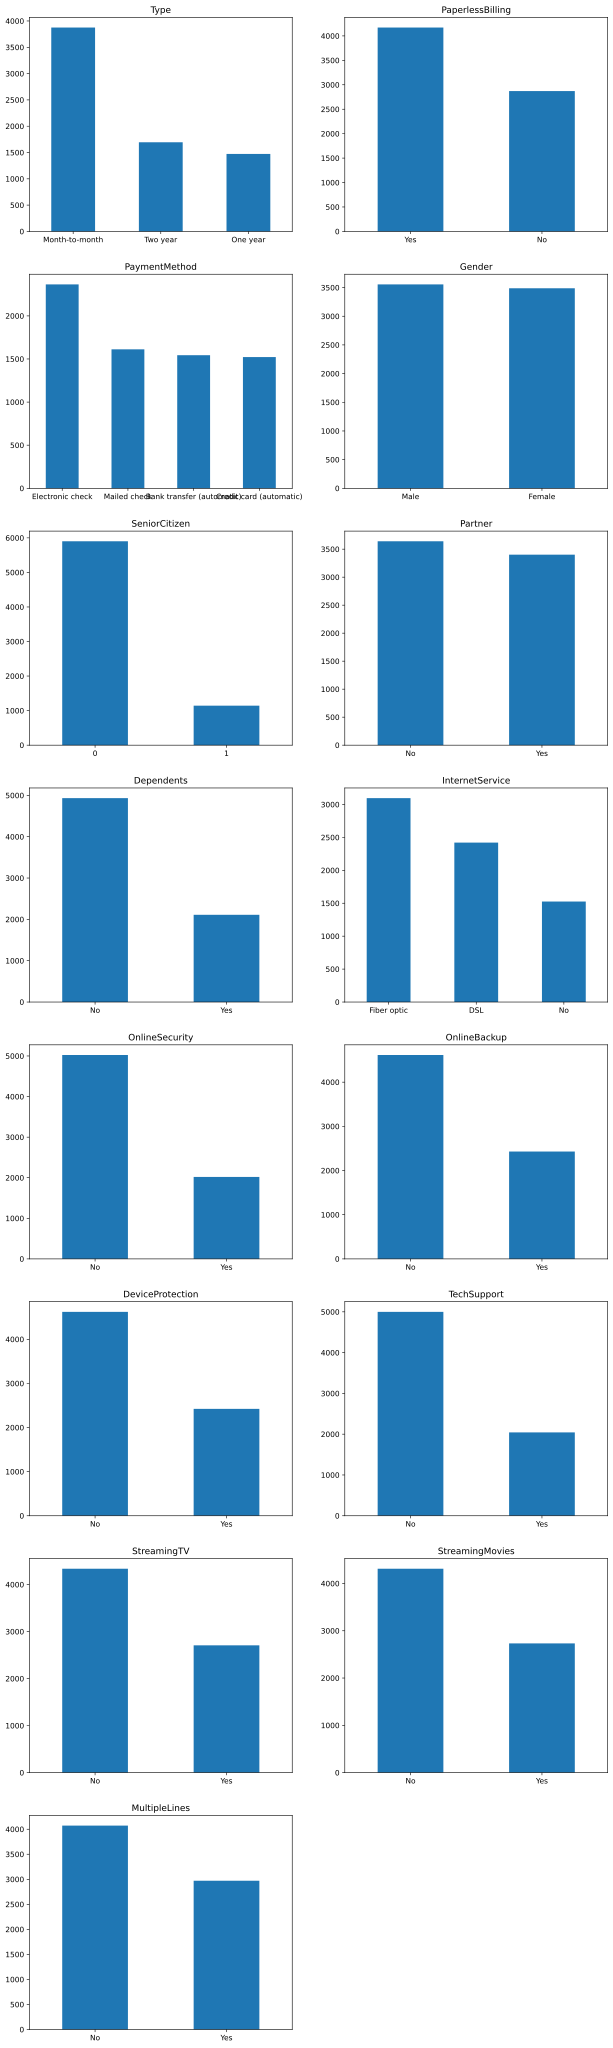

In [37]:
cols = 2
rows = int(np.ceil(len(categorial_columns) / cols))

plt.figure(figsize=(14, 50))

for idx, column in enumerate(categorial_columns):
    ax = plt.subplot(rows, cols, idx + 1)
    
    merged_df[column].value_counts().plot(
        kind='bar', 
        title=column, 
        ax=ax,
        rot=0 
    )
        
plt.show()

Самый популярный способ оплаты - помесячный
Люди чаще предпочитают получать счета в электронном виде и оплачивать их при помощи электронного чека
Самый частый способ подключения - оптоволокно
Дополнительные услуги OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines не пользуются популярностью у пользователей

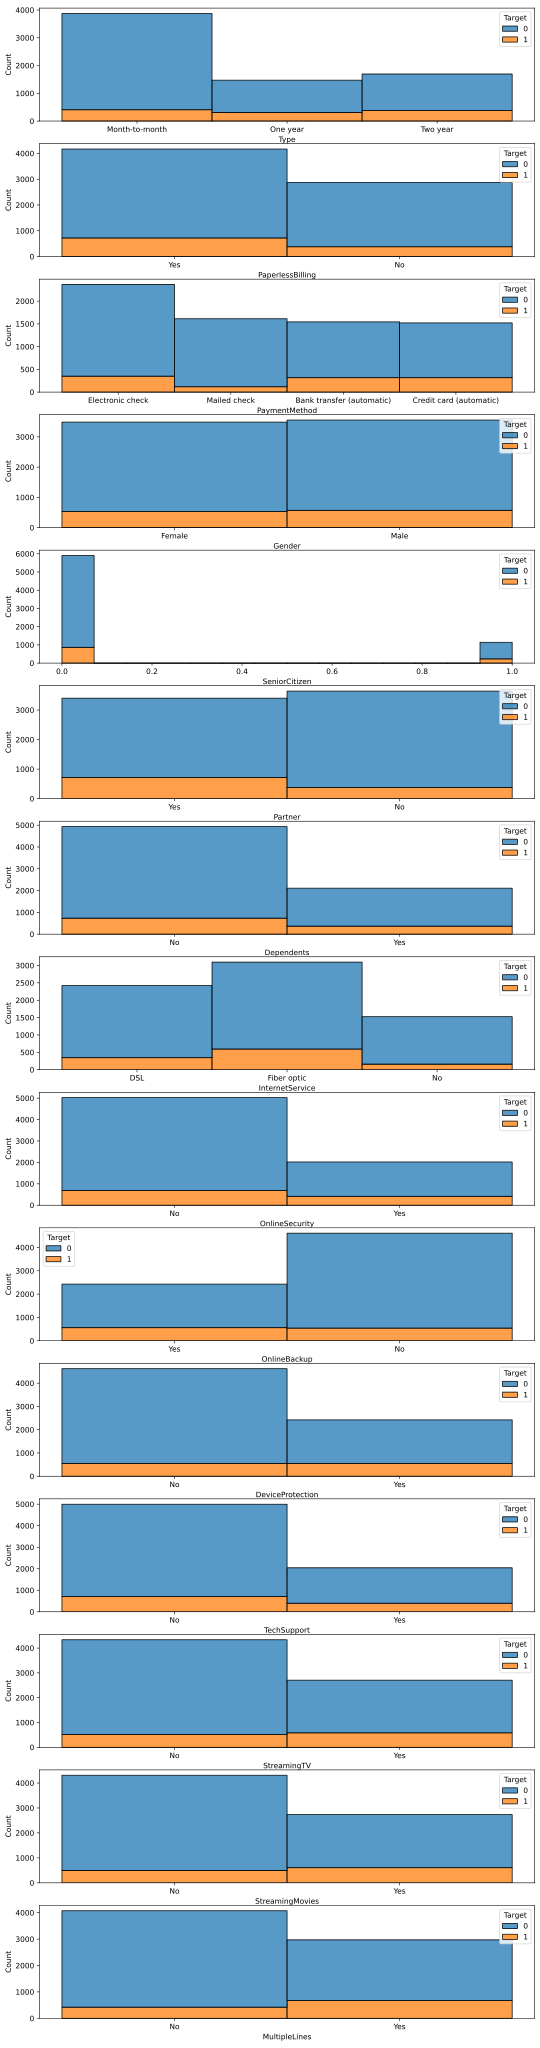

In [38]:
cols = 1
rows = int(np.ceil(len(categorial_columns) / cols))

plt.figure(figsize=(12, 50))

for idx, column in enumerate(categorial_columns):
    ax = plt.subplot(rows, cols, idx + 1)
    
    sns.histplot(merged_df, x=merged_df[column], hue='Target', multiple="stack")
    
        
plt.show()

Изучая распределение признаков и долю целевых среди них можно сделать следующие выводы:
* Число отказов среди подписок на два года наибольшее в процентном отношении. Доля отказов клиентов с однолетней подпиской тоже высокая 
* Доля отказов клиентов с безналичный расчетом значительно выше
* доля отказов среди мужчин немного выше
* доля пенсионеров среди отказников значительно выше
* наличие иждивенцев

* клиенты с оптоволоконным кабелем отказываются чаще
*  клиенты с допуслугами отказываются чаще

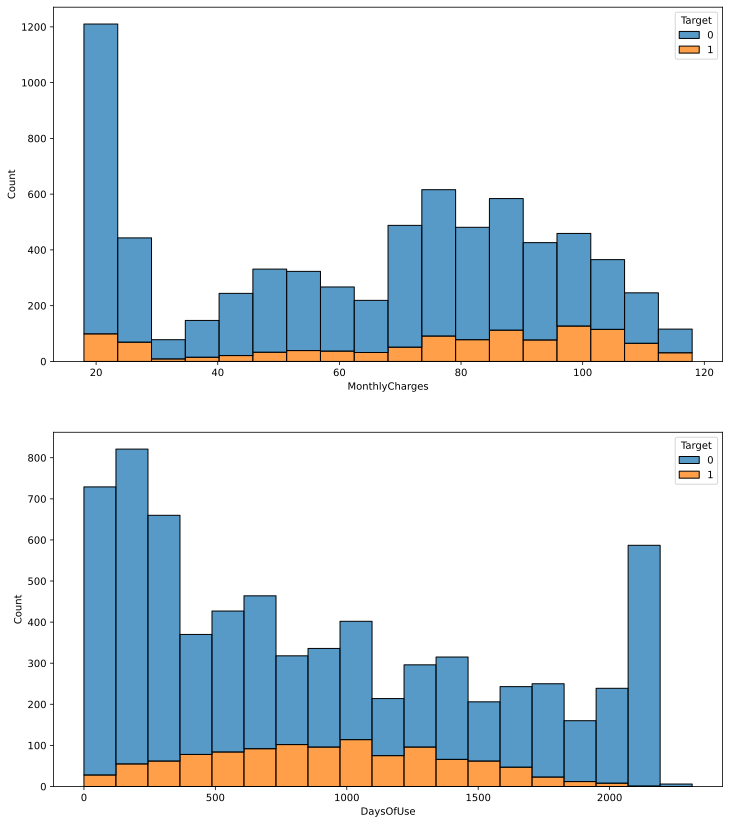

In [39]:
cols = 1
rows = 4
idx=4
plt.figure(figsize=(12, 30))
for idx, column in enumerate(numeric_columns):
        ax = plt.subplot(rows, cols, idx + 1)
        sns.histplot(merged_df, x=column, hue='Target', multiple="stack")

In [40]:
merged_df[numeric_columns].corr()

,MonthlyCharges,DaysOfUse
MonthlyCharges,1.000000,0.220056
DaysOfUse,0.220056,1.000000


Можно заметить корреляцию между дня
Можно заметить, что у нас присутствует проблема мультиколлинеарности в данных - корреляция между TotalCharges и TotalDays - 0.82, что логично - чем дольше клиент платит, тем больше итоговая сумма. Удалим поле TotalCharges

In [41]:
merged_df.columns

Index(['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Target',
       'DaysOfUse', 'MonthsOfUse'],
      dtype='object')

<AxesSubplot:>

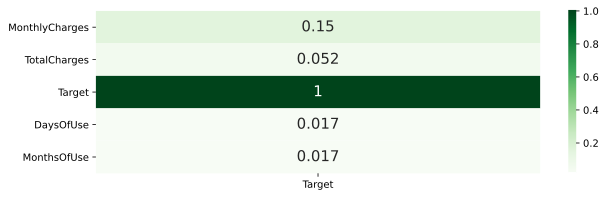

In [42]:

plt.figure(figsize=(10,3))
sns.heatmap(merged_df[['MonthlyCharges','TotalCharges','Target','DaysOfUse', 'MonthsOfUse']].corr()[['Target']], cmap="Greens", 
            annot=True, annot_kws={'size':15})

In [43]:
print(merged_df.columns.to_list())

['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Target', 'DaysOfUse', 'MonthsOfUse']


5.Подготовка данных.

In [44]:
merged_df_copy=merged_df.copy()

In [45]:
merged_df_copy.columns

Index(['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Target',
       'DaysOfUse', 'MonthsOfUse'],
      dtype='object')

In [46]:
merged_df_copy=merged_df_copy.drop(['BeginDate','EndDate'] , axis=1)
merged_df_copy.columns

Index(['CustomerID', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'Target', 'DaysOfUse', 'MonthsOfUse'],
      dtype='object')

удаляем лишние колонки ( так как эти признаки мы уже использовали)

выводы
Самый популярный способ оплаты - помесячный
Люди чаще предпочитают получать счета в электронном виде и оплачивать их при помощи электронного чека
Можно увидеть сильную связь между размером платежа в месяц/год и долей отказавшихся клиентов- с увеличением размера платежа доля отказавшихся клиентов растет.Также видно связь между общим временем пользования тарифом и долей отказа от услуг. Так рост доли происходит с самого начала пользования тарифом и начинает уменьшаться только после 1400 дней пользования тарифом

In [47]:
merged_df_copy=merged_df_copy.drop(['TotalCharges','MonthsOfUse','Gender','CustomerID'], axis=1 )
                          

In [48]:
merged_df_copy['MonthlyCharges']=merged_df_copy['MonthlyCharges']

In [49]:
merged_df_copy.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Type              7043 non-null   object
 1   PaperlessBilling  7043 non-null   object
 2   PaymentMethod     7043 non-null   object
 3   MonthlyCharges    7043 non-null   int64 
 4   SeniorCitizen     7043 non-null   int64 
 5   Partner           7043 non-null   object
 6   Dependents        7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
 14  MultipleLines     7043 non-null   object
 15  Target            7043 non-null   int64 
 16  DaysOfUse         7043 non-null   int64 
dtypes: int64(4), o

### Шаг 5. Подготовка данных

In [50]:
features = merged_df_copy.drop(['Target'] , axis=1)
target = merged_df_copy['Target']

In [51]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.25, random_state=RANDOM_STATE)

print('Размер тренерующей выборки', features_train.shape[0])

print('Размер тестовой выборки', features_test.shape[0])

Размер тренерующей выборки 5282
Размер тестовой выборки 1761


In [52]:
X_train=features_train.copy()
X_test=features_test.copy()

In [53]:
scaler = StandardScaler()
scaler.fit(features_train[numeric_columns])
features_train = features_train.copy()
features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_test = features_test.copy()
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

In [54]:
#категориальные признаки для OHE Ridge
ohe_features_ridge = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features_ridge)

#категориальные признаки для OHE RandomForestRegressor
ohe_features_rf = ohe_features_ridge.copy()

['Type', 'PaperlessBilling', 'PaymentMethod', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [55]:
#численные признаки

num_features = features_train.select_dtypes(exclude='object').columns.to_list()


num_features

['MonthlyCharges', 'SeniorCitizen', 'DaysOfUse']

In [56]:
ohe_features_ridge

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [57]:

encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(X_train[ohe_features_ridge])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
X_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_train[ohe_features_ridge])

# удаляем незакодированные категориальные признаки (изначальные колонки)
X_train = X_train.drop(ohe_features_ridge, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
X_train[num_features] = scaler.fit_transform(X_train[num_features])

# смотрим на результат
X_train.head()

,MonthlyCharges,SeniorCitizen,DaysOfUse,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
5295,1.448085,2.259725,0.326132,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
964,-0.648503,-0.442532,-1.230436,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5818,1.348247,-0.442532,1.571387,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
5189,-0.348990,-0.442532,-1.275745,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2302,0.882339,-0.442532,1.840315,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
X_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_test[ohe_features_ridge])

X_test = X_test.drop(ohe_features_ridge, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
X_test[num_features] = scaler.transform(
    X_test[num_features]
)

# смотрим на результат
X_test.head()



,MonthlyCharges,SeniorCitizen,DaysOfUse,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
3286,1.015456,2.259725,0.324671,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6059,-0.814899,-0.442532,-0.254110,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
544,-0.648503,-0.442532,-0.563962,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6745,1.181851,-0.442532,0.235515,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2524,-1.513761,-0.442532,-0.746658,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Шаг 6. Обучение моделей машинного обучения

In [59]:

model_rfr =  RandomForestClassifier()
model_lr =(LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced'))
model_LGBM= LGBMClassifier(objective='binary', metric='auc')  
model_cat=CatBoostClassifier(cat_features=['Type', 'PaperlessBilling', 'PaymentMethod',  'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'])
n_iter_search = 12 

### Модель LGBM

In [60]:


%%time
parameters_LGBM={'learning_rate': [0.0005, 0.001, 0.01, 0.05, 0.1],
                       'n_estimators': [100, 200, 300, 500],
                       'num_leaves': [10, 20, 30, 50, 70, 100, 150],
                     'class_weight': [ 'balanced'],
                 'feature_fraction':[0.6,0.8]
                 
               }


random_search = RandomizedSearchCV(model_LGBM, 
                                   param_distributions=parameters_LGBM, 
                                   n_iter=50, 
                                   cv=5, 
                                   random_state=RANDOM_STATE,
                        verbose = 0, 
                        n_jobs=-1,
                                   scoring = 'roc_auc'
                                   
                                      ) 
random_search.fit(X_train, target_train) 
LGBM_final =random_search.best_score_
random_search_best=random_search.best_estimator_
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB


{'learning_rate': [0.0005, 0.001, 0.01, 0.05, 0.1],
                       'n_estimators': [100, 200, 300, 500],
                       'num_leaves': [10, 20, 30, 50, 70, 100, 150],
                     'class_weight': [None, 'balanced'],
                'min_data_in_leaf':[50,100,200,300],
                'feature_fraction':[0.5,0.6,0.8]}

In [61]:
print('Лучший результат в модели LGBM',random_search.best_score_)

Лучший результат в модели LGBM 0.896089800738521


### Модель LogisticRegression

In [62]:
%%time

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [10,20,40,60, 100]
    
}

search_lr = GridSearchCV(model_lr, param_grid, cv=5, verbose=1, scoring='roc_auc')
search_lr.fit(X_train, target_train)

print(search_lr.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.7605148341965821
CPU times: user 13.3 s, sys: 14.1 s, total: 27.4 s
Wall time: 27.4 s


In [63]:
print(search_lr.best_params_)

{'C': 10, 'max_iter': 20}


### Модель RandomForestClassifier

In [64]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [65]:
%%time
grid = GridSearchCV(model_rfr,param_grid=grid_space,cv=3,scoring='roc_auc')
model_grid = grid.fit(X_train, target_train)

CPU times: user 4min 15s, sys: 2.22 s, total: 4min 17s
Wall time: 4min 17s


In [66]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score is: 0.83398926730712


### Модель CatBoostClassifier

In [67]:
parameters_cat = {'learning_rate':[0.01, 0.05, 0.1 ,0.5,0.6],
                  'iterations':[100,200],
                  'random_state':[290124],
                  'depth': [2,4, 6,8,10]
                 }

In [68]:
%%time
random_search_cat = RandomizedSearchCV(model_cat, 
                                   param_distributions=parameters_cat, 
                                   n_iter=10, 
                                   cv=2, 
                                   verbose=True,scoring = 'roc_auc'
                                   
                                  )
                                   
                                     
random_search_cat.fit(features_train, target_train) 
Cat_final =random_search_cat.best_score_
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
0:	learn: 0.6859386	total: 51.9ms	remaining: 10.3s
1:	learn: 0.6795176	total: 55.2ms	remaining: 5.46s
2:	learn: 0.6729514	total: 58.5ms	remaining: 3.84s
3:	learn: 0.6646251	total: 61.8ms	remaining: 3.03s
4:	learn: 0.6570477	total: 64.7ms	remaining: 2.52s
5:	learn: 0.6509193	total: 67.6ms	remaining: 2.19s
6:	learn: 0.6441764	total: 70.8ms	remaining: 1.95s
7:	learn: 0.6371025	total: 73.9ms	remaining: 1.77s
8:	learn: 0.6309947	total: 77.1ms	remaining: 1.64s
9:	learn: 0.6249518	total: 80.4ms	remaining: 1.53s
10:	learn: 0.6200187	total: 82.8ms	remaining: 1.42s
11:	learn: 0.6137093	total: 85.9ms	remaining: 1.35s
12:	learn: 0.6081747	total: 89ms	remaining: 1.28s
13:	learn: 0.6023280	total: 92ms	remaining: 1.22s
14:	learn: 0.5958668	total: 95.1ms	remaining: 1.17s
15:	learn: 0.5904368	total: 98.1ms	remaining: 1.13s
16:	learn: 0.5855790	total: 101ms	remaining: 1.09s
17:	learn: 0.5805551	total: 104ms	remaining: 1.05s
18:	learn: 0.575990

По итогам обучения моделей можно сказать следующее:

LogisticRegression хуже других справляется с задачей. AUC-ROC 0.756

RandomForestClassifier работает почти так же, как и регрессия, AUC-ROC равен 
LGBMClassifier показывет хорошую метрику (0.9). Полнота и accuracy самые высокие. 

### Шаг 7. Выбор лучшей модели

видим что лучшая модель это LGBM с результатом 0.91
проверим ее на тестовой выборке 

In [69]:
prediction= random_search_best.predict_proba(X_test)[:, 1]
roc_auc_score(target_test, prediction)

0.9123172549773974

Видим что модель избежала переобучения auc на тестовой выборке 0.91 что удовлетворяет показателям

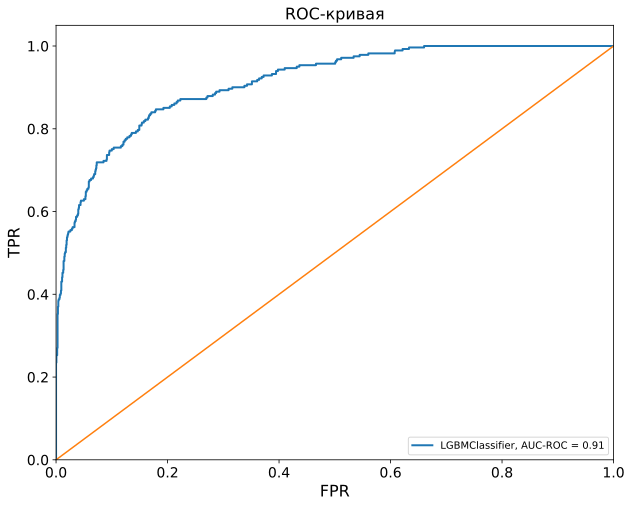

In [70]:
fpr1, tpr1, thresholds1 = roc_curve(target_test, random_search_best.predict_proba(X_test)[:,1], pos_label=1)


auc_lgbm = roc_auc_score(target_test, random_search_best.predict_proba(X_test)[:,1])

lw=2
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr1, tpr1, lw=lw, label= 'LGBMClassifier, AUC-ROC = %.2f' %auc_lgbm)


plt.title('ROC-кривая', fontsize=16)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

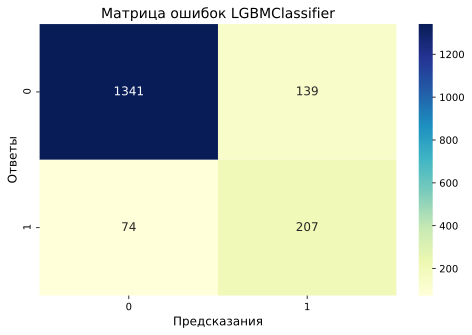

In [71]:

df_lgbm_confusion = pd.DataFrame(confusion_matrix(target_test, random_search_best.predict(X_test)))

sns.heatmap(df_lgbm_confusion, annot=True, cmap='YlGnBu', fmt='d', annot_kws={'fontsize':12})
plt.title('Матрица ошибок ' +'LGBMClassifier', fontsize=14)
plt.xlabel('Предсказания', fontsize=12)
plt.ylabel('Ответы', fontsize=12)
plt.show()

Модель  предсказывает действительно уходящих клиентов с высокой точностью. И что самое хорошее - выдает очень высокое True Positive то есть верно определяя лояльных клиентов, то есть компания не тратит деньги на удержание лояльных клиентов

In [72]:
importances_df = pd.DataFrame(random_search.best_estimator_.feature_importances_, index = X_test.columns, columns=['importances'])
importances_df = importances_df.sort_values(by='importances', ascending=False)
importances_df.head()

,importances
DaysOfUse,3670
MonthlyCharges,1836
Dependents_Yes,295
DeviceProtection_Yes,283
Partner_Yes,279


In [73]:
predictions= random_search_best.predict(X_test)

In [74]:
acc= sklearn.metrics.accuracy_score(target_test, predictions)
print('Доля правильных ответов модели на тестовой выборке',acc)

Доля правильных ответов модели на тестовой выборке 0.879045996592845


почему то не получается использовать shap оставил код ниже
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
Cell In[208], line 4
      2 explainer = shap.TreeExplainer(model)
      3 shap_values = explainer(X_test)
----> 4 shap.plots.bar(shap_values)

File C:\ProgramData\Anaconda3\lib\site-packages\shap\plots\_bar.py:159, in bar(shap_values, max_display, order, clustering, clustering_cutoff, merge_cohorts, show_data, show)
    157 for pos,inds in enumerate(orig_inds):
    158     if len(inds) == 1:
--> 159         feature_names_new.append(feature_names[inds[0]])
    160     else:
    161         full_print = " + ".join([feature_names[i] for i in inds])

IndexError: list index out of range

model = random_search.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)


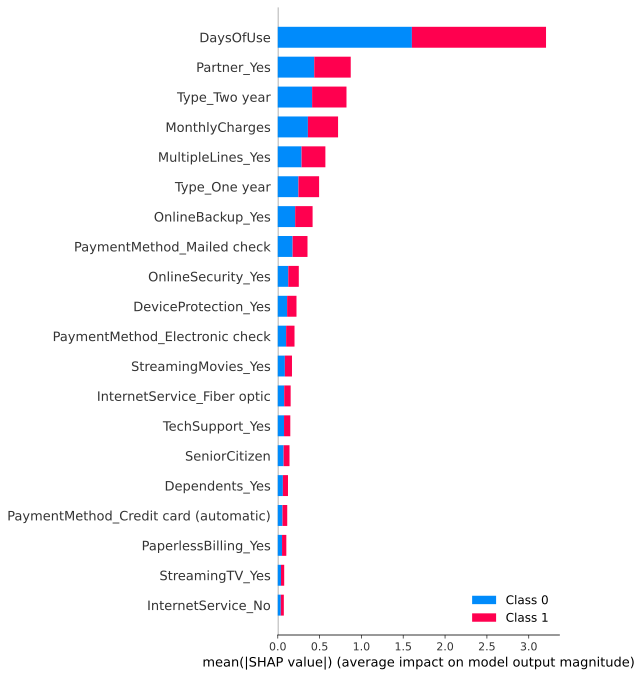

In [75]:

shap_test = shap.TreeExplainer(random_search.best_estimator_).shap_values(X_test)
shap.summary_plot(shap_test,X_test,
                      max_display=25, auto_size_plot=True)

### Шаг 8. Общий вывод и рекомендации заказчику

В результате исследования по результатам roc_auc лучше всего себя показала модель - LGBMCLassifier. Но при проверке на тестовой выборке она показала roc_auc 0.843 что показывает переобученность модели.

Общий вывод и рекомендации заказчику.
Телеком компания предоставила данные в 4 файлах. Необходимо было обучить модель, которая предсказывала бы отток клиентов. Целевая метрика - ROC-AUC не ниже 0.85.
Сначала данные были прочитаны и по ним были сделаны предварительные выводы.
После этого была произведена первичная обработка данных - переименованы столбцы, изменены типы данных.
Были добавлены 2 новых столбца - целевой признак Target, который означает отказался ли клиент от услуг и DaysOfUse, который обозначает сколько по времени пользователь пользовался услугами.
После этого был проведен исследовательский анализ данных - проанализированы количественные и категоральные признаки, проведена попытка найти связь между ними и целевым признаком.
Были сделаны следующие выводы:
Можно увидеть сильную связь между размером платежа в месяц/год и долей отказавшихся клиентов- с увеличением размера платежа доля отказавшихся клиентов растет.Также видно связь между общим временем пользования тарифом и долей отказа от услуг. Так рост доли происходит с самого начала пользования тарифом и начинает уменьшаться только после 1400 дней пользования тарифом. Затем после достижения 1900 дней доля ушедших становится минимальной.
Также была обнаружена сильная связь между TotalCharges и вренем использования поэтому принято решение удалить TotalCharges 
    После этого была проведена подготовка данных к обучению моделей: удалены ненужные столбцы, применена техника OHE для части моделей, датафрейм был разделен на обучающую и тестовую выборки, проведено масштабирование количественных признаков.
после чего были обучены модели и выбрана лучшая по результатам roc_auc.
 В данной задаче помимо поиска клиентов которые собираются уходить чрезвычайно важно не ошибаться в присвоении ложноположительных результатов. Так как  компании важно не тратить деньги на удержание лояльных клиентов . По результатом обучения модели она способна выполнить эти задачи с достаточной точностью.

В качестве рекомендаций бизнесу также стоит задуматься над удержанием новых клиентов, так как очень много клиентов уходит в течении первого года , что свидетельствует о риске для компании так как это ограничивает возможности роста, также существует риск ухудшения положения компании при уходе старых клиентов так как новые клиенты остаются непродолжительное время.Также компании стоит посчитать рекламные затраты на привлечение новых клиентов и сравнить с прибылью которую они получают от новых клиентов( так как возможно привлечение невыгодно из за короткого срока пользования услугами компании)

